### Import libaries

In [1]:
import gc
import sys
import os 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
home = os.path.expanduser("~")
sys.path.append(f"{home}/Documents/projects/CarPriceRegression/Machine_Learning/scripts/")

In [3]:
from DataSetUp import *
from TreeCarPrice import *
%load_ext autoreload
%autoreload 2

### Import data and split into train and test 

In [4]:
data = pd.read_csv(f"{home}/Documents/projects/CarPriceRegression/Processed_Data/car_onehot_data.csv")
features,y = data.drop("price",axis=1), data.price

In [5]:
data_setup = DataSetUp(features,y)

In [6]:
X_train,X_test,y_train,y_test = data_setup.data_split(2020,0.1)

### garbage collect

In [7]:
gc.collect()
%reset -f out

Flushing output cache (0 entries)


----
### Decision tree classifer 

* base model 

In [8]:
base_model = DecisionTreeRegressor(random_state=2020)

In [9]:
car_price_decision = treeCarPrice(base_model,True)

In [10]:
car_price_decision.regression_metrics(X_train,y_train,ind="train")

,r2_score,rmse,price_diff_abs_max
train,0.95629,2067.865839,488.333333


In [29]:
car_price_decision.regression_metrics(X_test,y_test,ind="test",retrain=False)

,r2_score,rmse,price_diff_abs_max
test,0.936699,2426.924577,270.222222


In [12]:
car_price_decision._trained_model.max_features_

219

### Much better as compared to a linear regression model with elasticnet regularization. 

### Let's perform gridsearch to see if we can further improve the result

#### Key parameters:
  * max_depth: default None
  * min_samples_split: repeat of max_depth, default 2 
  * min_samples_leaf:default 1 
  * max_features: default None (n_features)

In [13]:
params = {
    "max_features":[0.8,"sqrt","log2","auto",None,0.9]
}

In [14]:
car_price_decision.param_search(params,X_train,y_train,V=0)

In [15]:
car_price_decision.search_result.best_params_

{'max_features': 'auto'}

In [16]:
car_price_decision.search_result.best_estimator_.max_features_

219

In [17]:
decision_tree_tuned = car_price_decision.search_result.best_estimator_

In [26]:
car_price_decision.regression_metrics(X_train,y_train,"train")

,r2_score,rmse,price_diff_abs_max
train,0.95629,2067.865839,488.333333


In [27]:
car_price_decision.regression_metrics(X_test,y_test,"test",retrain=False)

,r2_score,rmse,price_diff_abs_max
test,0.936699,2426.924577,270.222222


### all features, the same as default tree params

### Let's look at feature importance

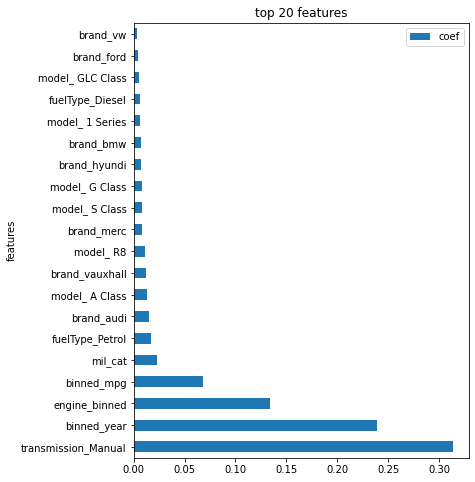

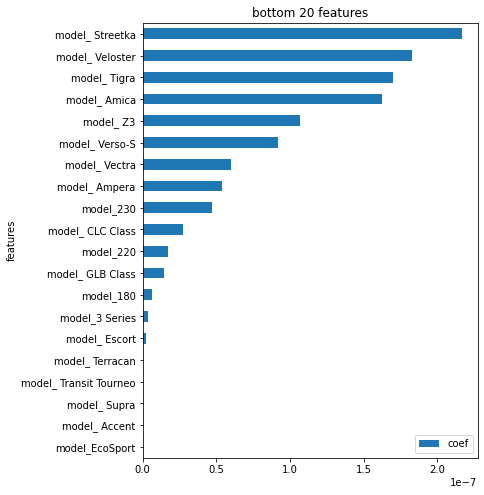

In [30]:
feature_table = car_price_decision.linear_feature_importance(features,plot=True)

### feature importance ranking is quite different from linear regression model.

### Looking at cases big price difference and small price difference

In [31]:
price_table_decision = car_price_decision.price_diff(features,y)

In [33]:
price_table_decision.head(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,brand_bmw,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,price_diff_pct,price_diff_abs
47201,1,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,488.333333,488.333333
44539,1,4,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,456.481481,456.481481
71617,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,325.516674,325.516674
72016,1,5,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,323.613917,323.613917
71817,1,5,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,270.222222,270.222222
72349,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,263.753724,263.753724
44553,1,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,250.713649,250.713649
12301,2,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,249.186483,249.186483
78800,2,2,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,244.627917,244.627917
83274,2,3,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,243.883522,243.883522


In [34]:
price_table_decision.tail(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,brand_bmw,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,price_diff_pct,price_diff_abs
20085,4,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
64473,3,0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.0,0.0
64478,3,0,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.0,0.0
20061,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
20060,3,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
20054,2,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
20051,2,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
86112,3,2,4,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0.0
20047,1,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
20044,3,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0


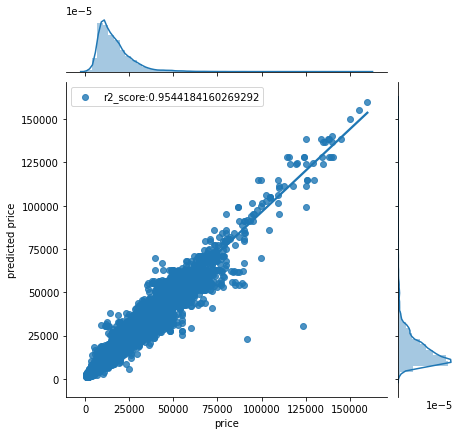

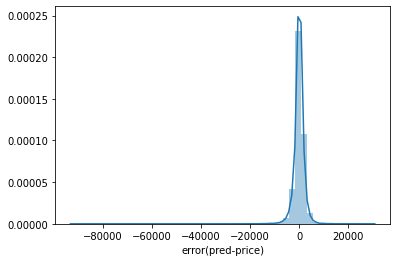

In [35]:
car_price_decision.plot_pred_price(features,y)

### Let's see if an ensemble method would improve the outcome

In [36]:
base_forest = RandomForestRegressor(random_state=2020)

In [37]:
car_price_forest = treeCarPrice(base_forest,False)

In [38]:
car_price_forest.regression_metrics(X_train,y_train,"train")

,r2_score,rmse,price_diff_abs_max
train,0.955037,2097.290228,517.68299


In [39]:
car_price_forest.regression_metrics(X_test,y_test,"test",retrain=False)

,r2_score,rmse,price_diff_abs_max
test,0.940397,2354.971821,245.860431


### Slightly better than decision tree in terms of R2

#### Let's tune with gridsearch

#### Key parameters:

* n_estimators: default 100 
* max_features: default auto (all feautres) sqrt, log2 
* max_samples: if boostrap is true, num of samples draw from X to train , default =None, all samples


In [40]:
params_forest = {
    "n_estimators":[50,100,200,300],
    "max_samples":[None,0.8,0.9]   
}

In [41]:
car_price_forest.param_search(params_forest,X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=22)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:  1.1min
[Parallel(n_jobs=22)]: Done  60 out of  60 | elapsed:  9.1min finished


In [42]:
forest_tuned_model = car_price_forest.search_result.best_estimator_

In [43]:
car_price_forest.search_result.best_params_

{'max_samples': None, 'n_estimators': 100}

In [45]:
car_price_forest.regression_metrics(X_train,y_train,"train")

,r2_score,rmse,price_diff_abs_max
train,0.955037,2097.290228,517.68299


In [46]:
car_price_forest.regression_metrics(X_test,y_test,"test",retrain=False)

,r2_score,rmse,price_diff_abs_max
test,0.940397,2354.971821,245.860431


<!-- ### plot trees -->

### same as default model 

### Let's look at feature importances

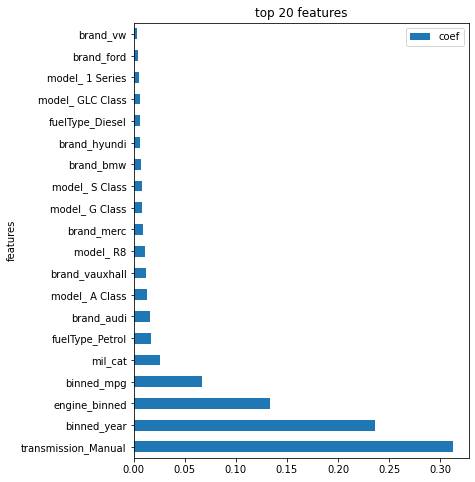

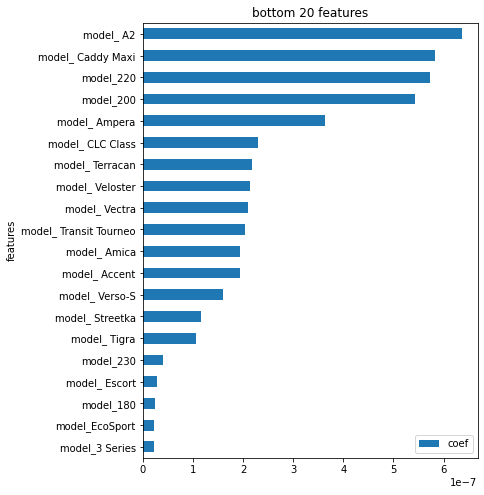

In [47]:
feature_table = car_price_forest.linear_feature_importance(features)

In [48]:
price_table_forest = car_price_forest.price_diff(features,y)

In [49]:
price_table_forest.head(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,brand_bmw,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,price_diff_pct,price_diff_abs
47201,1,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,517.682990,517.682990
44539,1,4,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,459.533893,459.533893
71617,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,324.357178,324.357178
72016,1,5,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,318.178130,318.178130
39711,1,2,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,273.800836,273.800836
72349,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,263.874979,263.874979
44553,1,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,251.282157,251.282157
78800,2,2,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,246.883507,246.883507
71817,1,5,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,245.860431,245.860431
83274,2,3,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,244.507828,244.507828


In [50]:
price_table_forest.tail(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,brand_bmw,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,price_diff_pct,price_diff_abs
4934,4,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.001575,0.001575
88407,3,1,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.001432,0.001432
32465,4,2,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,-0.001414,0.001414
32437,4,2,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,-0.001414,0.001414
21544,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.001259,0.001259
21478,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.001259,0.001259
33105,4,2,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,-0.001060,0.001060
72704,3,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.000925,0.000925
42229,3,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,-0.000723,0.000723
79418,3,3,2,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.000592,0.000592


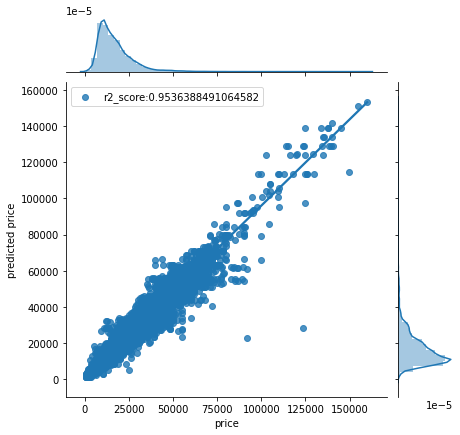

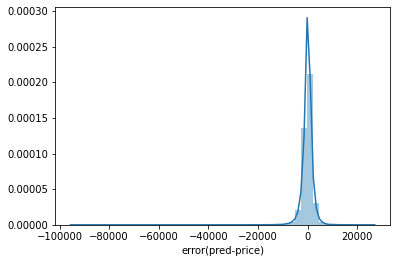

In [51]:
car_price_forest.plot_pred_price(features,y)

#### Tend to over predict price on old car with high milage. 

### Top features are similar among tree and random forest. Bottom features are relatively similar as well

### Let's look at how xgboost work:

In [52]:
xg_model = XGBRegressor(objective="reg:squarederror",seed=2020)
car_price_xg = treeCarPrice(xg_model,False)

In [53]:
car_price_xg.regression_metrics(X_train,y_train,"train")

,r2_score,rmse,price_diff_abs_max
train,0.938505,2452.750993,1032.272549


In [57]:
car_price_xg.regression_metrics(X_test,y_test,"test",retrain=False)

,r2_score,rmse,price_diff_abs_max
test,0.930928,2535.151312,466.803673


### GridSearchTuning

### Key parameters:
* learning_rate
* n_estimators
* subsample
* colsample_bytree

In [58]:
params = {
    "learning_rate":[0.25,0.5],
    "n_estimators":[150,200,250],
    "subsample":[0.9,0.8,0.7],
    "colsample_bytree":[1.0,0.9]
}

In [ ]:
car_price_xg.param_search(params,X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=22)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:  1.7min


In [ ]:
car_price_xg_tuned = car_price_xg.search_result.best_estimator_
car_price_xg.search_result.best_params_

In [ ]:
car_price_xg.regression_metrics(X_train,y_train,"train")

In [ ]:
car_price_xg.regression_metrics(X_test,y_test,"test",retrain=False)

### xgboost slightly outperforms random forest and decision tree. 

### Look at the features

In [ ]:
feature_table_xg = car_price_xg.linear_feature_importance(features,y)

### Let's see if we can remove bottom features to improve the performance

In [51]:
trimmed_features = car_price_xg.removeFeatures(features,20)
data_setup_trimmed = DataSetUp(trimmed_features,y)
X_train_trimmed,X_test_trimmed,y_train_trimmed,y_test_trimmed = data_setup_trimmed.data_split(1988,0.1)

In [53]:
car_price_xg.regression_metrics(X_train_trimmed,y_train_trimmed,"train")

,r2_score,rmse,price_diff_abs_max
train,0.949034,2222.163814,696.000602
test,0.934053,2587.521411,433.595427


In [ ]:
car_price_xg.regression_metrics(X_test_trimmed,y_test_trimmed,"test")

### Same metrics but with less features 
___

### Look at returns with big and small deta

In [ ]:
price_diff_xg = car_price_xg.price_diff(features,y)

In [ ]:
price_diff_xg.head(25)

In [ ]:
price_diff_xg.tail(25)

### Most of these cars are older cars.
___

In [ ]:
car_price_xg.plot_pred_price(feature,y)

### All three tree regressor models tend to have issues with older car especially if the car has lower mileage. 
___